# Cleaning the Data

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = '../Resources/U.S._Chronic_Disease_Indicators.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [5]:
# Drop columns with 0 non-null values
# Drop only the columns that exist in the dataset
columns_to_drop = [
    'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 
    'ResponseID', 'StratificationCategoryID2', 'StratificationID2','StratificationCategoryID3', 
    'StratificationID3', 'YearStart', 
    'DataValueFootnoteSymbol', 'DataValueFootnote', 'StratificationID1', 'StratificationCategoryID1'
    
]

# Filter columns_to_drop to include only existing columns
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the filtered list of columns
data.drop(columns=columns_to_drop, inplace=True)

print("Dropped unnecessary columns successfully!")


Dropped unnecessary columns successfully!


In [6]:
# Fill missing 'Geolocation' with 'Unknown'
data['Geolocation'].fillna('Unknown', inplace=True)

In [7]:
# Extract longitude and latitude into separate columns
data[['Longitude', 'Latitude']] = data['Geolocation'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')


In [8]:
# Drop duplicate rows
data = data.drop_duplicates()

In [9]:
#Rename Columns
data.rename(columns={'YearEnd': 'Year'}, inplace=True)
data.rename(columns={'LocationDesc': 'Location'}, inplace=True)
data.rename(columns={'LocationAbbr': 'LocationID'}, inplace=True)
data.rename(columns={'DataValue': 'Value'}, inplace=True)

In [10]:
# List of stratification categories
StratificationCategory1 = ['Sex', 'Age', 'Race/Ethnicity', 'Grade', 'Overall']

# Pivot the data: Create separate columns for each StratificationCategory
for category in StratificationCategory1:
    # Assign values from Stratification1 where StratificationCategory1 matches the current category
    data[category] = data['Stratification1'].where(data['StratificationCategory1'] == category)

# Drop the original columns if no longer needed
data.drop(columns=['StratificationCategory1', 'Stratification1'], inplace=True)

# Fill missing values in the new columns with 'Unknown' (optional)
data[StratificationCategory1] = data[StratificationCategory1].fillna('Unknown')


In [11]:
data.drop(columns=[ 'Overall'], inplace=True)

In [12]:
# Find the unique values in the DataValueUnit column
unique_units = data['DataValueUnit'].unique()
# Print the unique units
print(unique_units)
# Add a new column for each unique unit type, excluding "Number" in the formatted cells
unique_units = data['DataValueUnit'].unique()
# Create new columns
for unit in unique_units:
    data[unit] = data.apply(
        lambda row: f"{row['Value']} {unit}" if row['DataValueUnit'] == unit and unit != 'Number' else row['Value'] if row['DataValueUnit'] == unit else None,
        axis=1
    )
# View the updated DataFrame
print(data.head())

['%' 'Number' 'Years' 'per 100,000' 'cases per 100,000' 'cases per 1,000'
 'cases per 1,000,000' 'gallons']
   Year LocationID  Location DataSource     Topic  \
0  2019         AR  Arkansas      BRFSS  Diabetes   
1  2019         ID     Idaho      BRFSS  Diabetes   
2  2019         IN   Indiana      YRBSS     Sleep   
3  2019         IA      Iowa       NVSS    Asthma   
4  2019         IA      Iowa      BRFSS    Asthma   

                                            Question DataValueUnit  \
0                              Diabetes among adults             %   
1                              Diabetes among adults             %   
2    Short sleep duration among high school students             %   
3  Asthma mortality among all people, underlying ...        Number   
4                        Current asthma among adults             %   

      DataValueType  Value  DataValueAlt  ...  Race/Ethnicity     Grade  \
0  Crude Prevalence   13.6          13.6  ...         Unknown   Unknown   
1 

In [13]:
# Define the new column order
new_column_order = ['Year','Sex', 'Age', 'Grade', 'Race/Ethnicity', 'DataSource',
                    'Location','LocationID','Geolocation', 'Longitude', 'Latitude', 
                    'Topic', 'TopicID', 'Question', 'QuestionID', 'Value', 'DataValueUnit', 
                    'DataValueType', 'DataValueAlt', 'DataValueTypeID', 'LowConfidenceLimit', 'HighConfidenceLimit' ]
# Reorder the DataFrame
data_reordered = data[new_column_order]

In [14]:
data = data_reordered.sort_values(by=['DataSource'], ascending=[True])
data.reset_index(drop=True, inplace=True)

In [15]:
data.head()

,Year,Sex,Age,Grade,Race/Ethnicity,DataSource,Location,LocationID,LocationID,Geolocation,...,TopicID,Question,QuestionID,Value,DataValueUnit,DataValueType,DataValueAlt,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit
0,2019,Unknown,Unknown,Unknown,Hispanic,ACS,California,CA,6,POINT (-120.99999953799971 37.63864012300047),...,SDOH,High school completion among adults aged 18-24,SDH02,87.7,%,Crude Prevalence,87.7,CRDPREV,87.0,88.4
1,2019,Male,Unknown,Unknown,Unknown,ACS,New York,NY,36,POINT (-75.54397042699964 42.82700103200045),...,SDOH,Unemployment rate among people 16 years and ol...,SDH08,4.7,%,Crude Prevalence,4.7,CRDPREV,4.4,5.0
2,2021,Unknown,Unknown,Unknown,"Black, non-Hispanic",ACS,Georgia,GA,13,POINT (-83.62758034599966 32.83968109300048),...,SDOH,Living below 150% of the poverty threshold amo...,SDH01,30.8,%,Crude Prevalence,30.8,CRDPREV,29.3,32.4
3,2019,Unknown,Unknown,Unknown,Unknown,ACS,Utah,UT,49,POINT (-111.58713063499971 39.360700171000474),...,SDOH,Unemployment rate among people 16 years and ol...,SDH08,3.0,%,Crude Prevalence,3.0,CRDPREV,2.7,3.4
4,2021,Unknown,Unknown,Unknown,"Black, non-Hispanic",ACS,Nevada,NV,32,POINT (-117.07184056399967 39.493240390000494),...,SDOH,High school completion among adults aged 18-24,SDH02,82.1,%,Crude Prevalence,82.1,CRDPREV,74.1,87.9


# How does smoking affect the risk of developing chronic obstructive pulmonary disease (COPD)

## Further Cleaning of dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '../Resources/final2_cleaned_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Function to map ages into desired age groups
def group_age(age):
    if isinstance(age, str):  # Ensure we handle strings
        if age == 'Age 18-44':
            return '18-44'
        elif age == 'Age >=65':
            return '65+'
        elif age == 'Age 45-64':
            return '45-64'
        elif age == 'Age 1-5':
            return '0-5'
        elif age == 'Age 12-17' or age == 'Age 6-14' or age == 'Age 6-11' or age == 'Age 10-13' or age == 'Age 6-9':
            return '6-17'
        elif age == 'Age 4 m - 5 y':
            return '0-5'
        elif age == 'Age 0-44':
            return '0-44'
        else:
            return 'Unknown'  # For any undefined or unexpected age values
    return 'Unknown'

# Apply the function to the 'Age' column directly
df['Age'] = df['Age'].apply(group_age)


In [4]:
# Filter rows based on relevant topics and smoking-related & COPD-related questions
filtered_data = df[df['Topic'].str.contains(
    'Tobacco|Health Status|Chronic Obstructive Pulmonary Disease|Social Determinants of Health',
    case=False, na=False
)]

# Further filter by specific smoking-related and COPD-related questions
smoking_copd_data = filtered_data[filtered_data['Question'].str.contains(
    'smoking|COPD', case=False, na=False
)]

In [5]:
# Dictionary for rewording questions
reworded_questions = {
    'Current cigarette smoking among adults': 'Current Smoking Among Adults',
    'Current smoking among adults with chronic obstructive pulmonary disease': 'Smoking Among Adults with COPD',
    'Chronic obstructive pulmonary disease among adults': 'COPD Prevalence Among Adults',
    'Hospitalization for chronic obstructive pulmonary disease as any diagnosis, Medicare-beneficiaries aged 65 years and older': 'COPD Hospitalizations in Medicare Beneficiaries (65+)',  # Merged
    'Hospitalization for chronic obstructive pulmonary disease as principal diagnosis, Medicare-beneficiaries aged 65 years and older': 'COPD Hospitalizations in Medicare Beneficiaries (65+)',  # Merged
    'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying or contributing cause': 'COPD Mortality Among Adults (45+)',  # Merged
    'Chronic obstructive pulmonary disease mortality among adults aged 45 years and older, underlying cause': 'COPD Mortality Among Adults (45+)'  # Merged
}
# Replace the original questions with the reworded versions
df['Reworded Question'] = df['Question'].replace(reworded_questions)

# Filter the relevant data for smoking and COPD-related questions
smoking_copd_data = df[df['Reworded Question'].isin(reworded_questions.values())]


In [6]:
# Display the first few rows of the filtered data to confirm
print(smoking_copd_data[['Reworded Question', 'Value', 'DataValueType', 'Topic']].head())

                 Reworded Question  Value            DataValueType  \
3562  COPD Prevalence Among Adults    7.5  Age-adjusted Prevalence   
3579  Current Smoking Among Adults   21.1         Crude Prevalence   
3589  Current Smoking Among Adults   10.3         Crude Prevalence   
3608  COPD Prevalence Among Adults    8.2  Age-adjusted Prevalence   
3609  Current Smoking Among Adults    NaN  Age-adjusted Prevalence   

                                      Topic  
3562  Chronic Obstructive Pulmonary Disease  
3579                                Tobacco  
3589                                Tobacco  
3608  Chronic Obstructive Pulmonary Disease  
3609                                Tobacco  


In [7]:
# Count of each unique DataValueType (e.g., Crude Prevalence, Age-adjusted Prevalence)
data_value_type_counts = smoking_copd_data['DataValueType'].value_counts()
print("Count of Each DataValueType in the Filtered Dataset:")
print(data_value_type_counts)

Count of Each DataValueType in the Filtered Dataset:
DataValueType
Crude Prevalence           7865
Number                     6240
Crude Rate                 6240
Age-adjusted Prevalence    6050
Age-adjusted Rate          5616
Name: count, dtype: int64


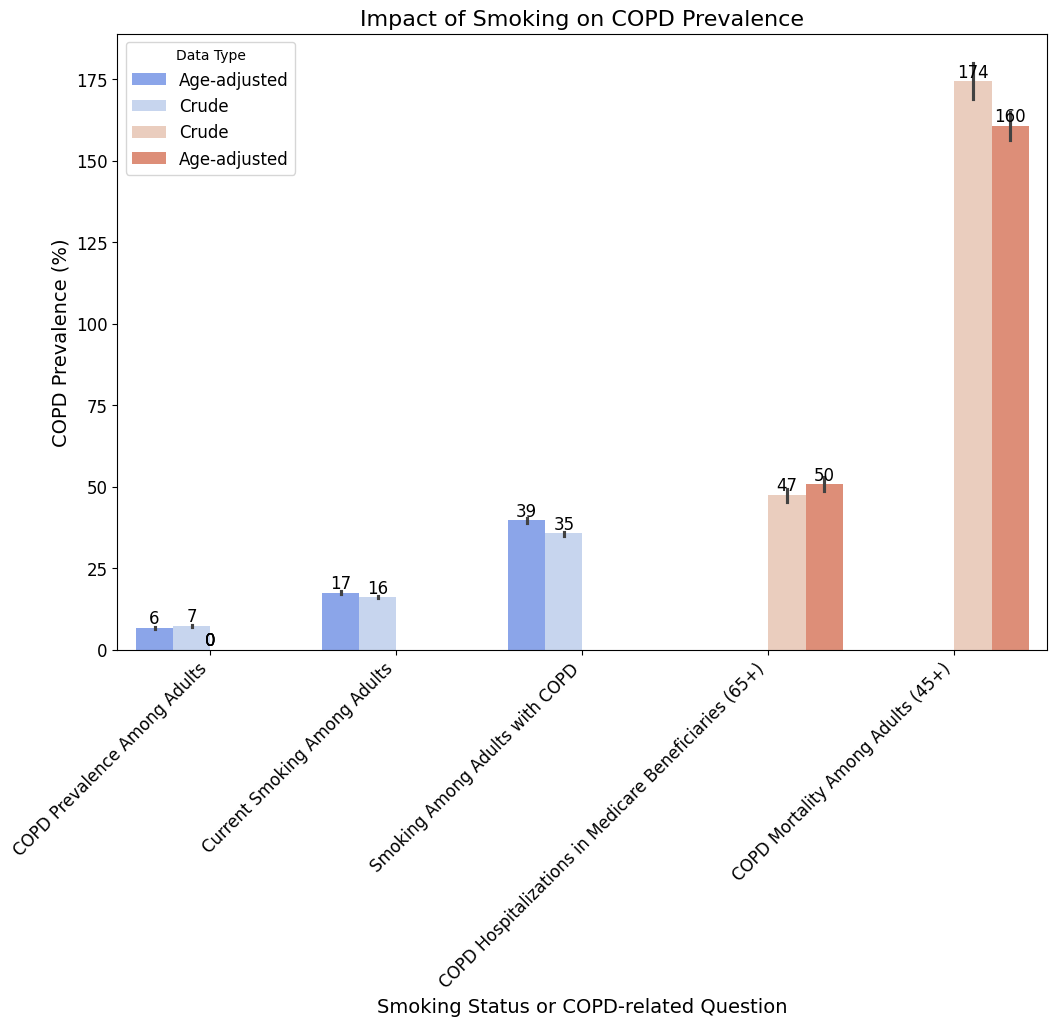

In [8]:

# Create a bar plot to show the correlation between smoking status and COPD prevalence
plt.figure(figsize=(12, 8))

# Filter out rows where 'DataValueType' contains the word 'Number'
filtered_data = smoking_copd_data[~smoking_copd_data['DataValueType'].str.contains('Number', case=False, na=False)]

# Create the bar plot using the filtered data (without 'Number' in DataValueType)
ax = sns.barplot(x='Reworded Question', y='Value', data=filtered_data, hue='DataValueType', palette='coolwarm')

# Add numbers (whole numbers) above the bars
for p in ax.patches:
    height = p.get_height()
    # Add text above each bar (rounded to whole numbers)
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (just above the bar)
        f'{int(height)}',  # Convert to whole number and display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment (so text is above the bar)
        fontsize=12  # Font size for the numbers
    )

# Set plot labels and title
plt.title('Impact of Smoking on COPD Prevalence', fontsize=16)
plt.xlabel('Smoking Status or COPD-related Question', fontsize=14)
plt.ylabel('COPD Prevalence (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Update legend to exclude numbers from DataValueType labels
handles, labels = plt.gca().get_legend_handles_labels()

# Remove the numbers from the legend labels by splitting at the first space
new_labels = [label.split(' ')[0] for label in labels]  # Keep only the first part of each label (e.g., 'Crude', 'Age-adjusted')

# Set the updated legend
plt.legend(handles=handles, labels=new_labels, title='Data Type', fontsize=12)

# Save the plot as a PNG image
plt.savefig('../Visualizations/VM_BarChart.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


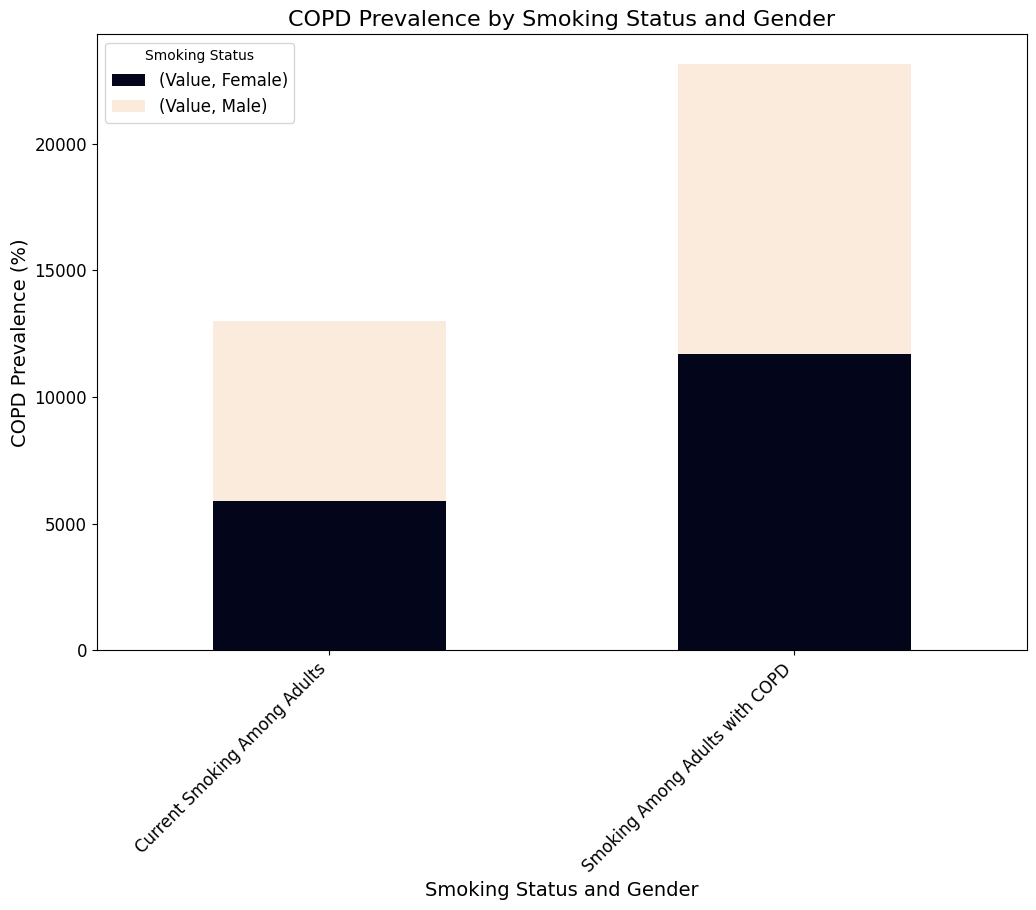

In [27]:
# Filter the data to include only the relevant questions
filtered_data = smoking_copd_data[smoking_copd_data['Reworded Question'].isin([
    'Current Smoking Among Adults', 
    'Smoking Among Adults with COPD'
])]

# Filter the data to include only Male and Female genders
filtered_data = filtered_data[filtered_data['Sex'].isin(['Male', 'Female'])]

# Ensure we have the 'Reworded Question', 'Value', 'Sex', and 'Smoking Status' columns
filtered_data = filtered_data[['Reworded Question', 'Value', 'Sex']]

# Group by 'Reworded Question', 'Smoking Status', and 'Sex', and sum the 'Value' (COPD prevalence)
grouped_data = filtered_data.groupby(['Reworded Question', 'Sex']).agg({'Value': 'sum'}).reset_index()

# Pivot the data so that each smoking status becomes a separate column and we have separate bars for Male and Female
pivot_data = grouped_data.pivot_table(index=['Reworded Question', 'Sex'], values='Value', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart with separate bars for Male and Female
pivot_data.unstack(level='Sex').plot(kind='bar', stacked=True, figsize=(12, 8), colormap=sns.color_palette("rocket", as_cmap=True))
# Add numbers (whole numbers) above the bars
for p in ax.patches:
    height = p.get_height()
    # Add text above each bar (rounded to whole numbers)
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (just above the bar)
        f'{int(height)}',  # Convert to whole number and display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment (so text is above the bar)
        fontsize=12  # Font size for the numbers
    )


# Set plot labels and title
plt.title('COPD Prevalence by Smoking Status and Gender', fontsize=16)
plt.xlabel('Smoking Status and Gender', fontsize=14)
plt.ylabel('COPD Prevalence (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the legend with appropriate labels
plt.legend(title='Smoking Status', fontsize=12)

# Show the plot
plt.show()
